In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import csv
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [0]:
# Reading data 
no_of_classes = 5                        #Change this ******
path = "/content/drive/My Drive/DL A2/"
filenames = {"Ankle boot.csv" : 0, "Bag.csv" : 1, "Coat.csv" : 2, "Shirt.csv" : 3, "Trouser.csv" : 4}
data = []
labels = []

for (name, index) in filenames.items():
  pathname = path + name
  df = pd.read_csv( pathname , delimiter =',', header = None)
  data.append(df)
  for i in range(df.shape[0]):
    labels.append(index)
df = pd.concat(data, axis=0, ignore_index=True)

In [0]:
df.shape

(30000, 784)

In [0]:
len(labels)

30000

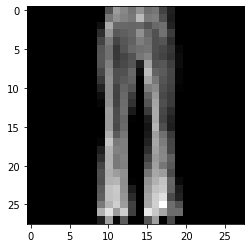

In [0]:
plt.imshow( np.array(df.tail(1)).reshape(28,28), cmap ='gray')

In [0]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation=tf.nn.relu),
#     tf.keras.layers.Dense(26, activation=tf.nn.softmax)])

# model.compile(optimizer = tf.train.AdamOptimizer(),
#               loss = 'sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
#                               steps_per_epoch=len(training_images) / 32,
#                               epochs=15,
#                               validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
#                               validation_steps=len(testing_images) / 32)

# model.evaluate(testing_images, testing_labels)

In [0]:
# Auto encoder
def autoencoder(X, hunits, epochs = 0):
  input_shape = X.shape[1]
  model = tf.keras.models.Sequential([
                  tf.keras.layers.Dense(hunits, activation = tf.nn.relu, input_dim = input_shape),
                  tf.keras.layers.Dense(input_shape, activation = tf.nn.relu)
  ])
  model.compile(loss = tf.losses.mean_squared_error, metrics = 'mse')
  model.summary()
  model.fit(X, X, epochs = epochs)
  return model


In [0]:
# Splitting data into test and train 

from sklearn.model_selection import train_test_split
train_data, test_data, train_labels , test_labels = train_test_split(df, labels, test_size=0.2, random_state = 1)

# Training data
train_data  = tf.convert_to_tensor(train_data, dtype ='float32')
train_labels = tf.convert_to_tensor(train_labels)
print(train_data.shape)
print(train_labels.shape)

# Testing data
test_data  = tf.convert_to_tensor(test_data, dtype ='float32')
test_labels = tf.convert_to_tensor(test_labels)
print(test_data.shape)
print(test_labels.shape)


(24000, 784)
(24000,)
(6000, 784)
(6000,)


In [0]:
# Layer 1 784 t0 500

layer1_model = autoencoder(train_data, 500, epochs = 5)
(W1, b1, W2, b2) = layer1_model.trainable_variables
params_layer1 = {"W1" : W1, "W2" : W2, "b1": b1, "b2":b2}
print("W1.shape : ",params_layer1["W1"].shape )
print("b1.shape : ", params_layer1["b1"].shape)
print("W2.shape : ", params_layer1["W2"].shape)
print("b2.shape : ", params_layer1["b2"].shape)



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 784)               392784    
Total params: 785,284
Trainable params: 785,284
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
750/750 [==============================] - 7s 9ms/step - loss: 2090.9819 - mse: 2090.9819
Epoch 2/5
750/750 [==============================] - 7s 9ms/step - loss: 1272.5765 - mse: 1272.5765
Epoch 3/5
750/750 [==============================] - 7s 9ms/step - loss: 1052.1108 - mse: 1052.1108
Epoch 4/5
750/750 [==============================] - 7s 9ms/step - loss: 976.1626 - mse: 976.1626
Epoch 5/5
750/750 [==============================] - 7s 9ms/step - loss: 932.2503 - mse: 932.2503
W1.shape :  (784

In [0]:
layer2_input = tf.nn.relu(tf.matmul( train_data, params_layer1["W1"]) + params_layer1["b1"])
print("layer2_input shape : ", layer2_input.shape)

layer2_input shape :  (24000, 500)


In [0]:
# Training layer 2

layer2_model = autoencoder(layer2_input, 300, 5)
(W1, b1, W2, b2) = layer2_model.trainable_variables
params_layer2 = {"W1" : W1, "W2" : W2, "b1": b1, "b2":b2}
print("W1.shape : ",params_layer2["W1"].shape )
print("b1.shape : ", params_layer2["b1"].shape)
print("W2.shape : ", params_layer2["W2"].shape)
print("b2.shape : ", params_layer2["b2"].shape)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_3 (Dense)              (None, 500)               150500    
Total params: 300,800
Trainable params: 300,800
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
750/750 [==============================] - 3s 4ms/step - loss: 1535.5483 - mse: 1535.5483
Epoch 2/5
750/750 [==============================] - 3s 5ms/step - loss: 1049.4769 - mse: 1049.4769
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 994.9580 - mse: 994.9580
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 960.9908 - mse: 960.9908
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 911.6901 - mse: 911.6901
W1.shape :  (500

In [0]:
layer3_input = tf.nn.relu(tf.matmul( layer2_input, params_layer2["W1"]) + params_layer2["b1"])
print("layer3_input shape : ", layer3_input.shape)

layer3_input shape :  (24000, 300)


In [0]:
# Training layer 3

layer3_model = autoencoder(layer3_input, 100, 5)
(W1, b1, W2, b2) = layer3_model.trainable_variables
params_layer3 = {"W1" : W1, "W2" : W2, "b1": b1, "b2":b2}
print("W1.shape : ",params_layer3["W1"].shape )
print("b1.shape : ", params_layer3["b1"].shape)
print("W2.shape : ", params_layer3["W2"].shape)
print("b2.shape : ", params_layer3["b2"].shape)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 300)               30300     
Total params: 60,400
Trainable params: 60,400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
750/750 [==============================] - 1s 1ms/step - loss: 2444.6301 - mse: 2444.6301
Epoch 2/5
750/750 [==============================] - 1s 2ms/step - loss: 1232.4927 - mse: 1232.4927
Epoch 3/5
750/750 [==============================] - 1s 2ms/step - loss: 1034.1514 - mse: 1034.1514
Epoch 4/5
750/750 [==============================] - 1s 1ms/step - loss: 957.9502 - mse: 957.9502
Epoch 5/5
750/750 [==============================] - 1s 2ms/step - loss: 919.3559 - mse: 919.3559
W1.shape :  (300

In [0]:
softmax_input = tf.nn.relu(tf.matmul( layer3_input, params_layer3["W1"]) + params_layer3["b1"])
print("softmax_input shape : ", softmax_input.shape)

softmax_input shape :  (24000, 100)


In [0]:
# Training softmax layer
softmax_model = tf.keras.models.Sequential([
                        tf.keras.layers.Dense(no_of_classes, activation = tf.nn.softmax, input_dim = softmax_input.shape[1])
])
softmax_model.compile(loss = tf.losses.sparse_categorical_crossentropy, metrics =['accuracy'])
softmax_model.fit(softmax_input, train_labels, epochs = 5)

Epoch 1/10
750/750 [==============================] - 1s 989us/step - loss: 19.5021 - accuracy: 0.7818
Epoch 2/10
750/750 [==============================] - 1s 1ms/step - loss: 5.1834 - accuracy: 0.8933
Epoch 3/10
750/750 [==============================] - 1s 1ms/step - loss: 3.7502 - accuracy: 0.9025
Epoch 4/10
750/750 [==============================] - 1s 980us/step - loss: 3.0192 - accuracy: 0.9030
Epoch 5/10
750/750 [==============================] - 1s 995us/step - loss: 2.5563 - accuracy: 0.9049
Epoch 6/10
750/750 [==============================] - 1s 975us/step - loss: 2.2579 - accuracy: 0.9050
Epoch 7/10
750/750 [==============================] - 1s 1ms/step - loss: 2.1313 - accuracy: 0.9012
Epoch 8/10
750/750 [==============================] - 1s 939us/step - loss: 1.9491 - accuracy: 0.9015
Epoch 9/10
750/750 [==============================] - 1s 978us/step - loss: 1.8951 - accuracy: 0.9024
Epoch 10/10
750/750 [==============================] - 1s 959us/step - loss: 1.8033 - a

In [0]:
# Parameters of softmax layer

(W1, b1) = softmax_model.trainable_variables
params_softmax = {"W1" : W1, "b1":b1} 
print("W1.shape", params_softmax["W1"].shape)
print("b1.shape", params_softmax["b1"].shape)


W1.shape (100, 5)
b1.shape (5,)


In [0]:
# Build a model using pre training W and b parameters 
# 784 -> 500 -> 300 -> 100 ->softmax()

# finalModel = tf.keras.models.Sequential([
#                   tf.keras.layers.Dense(500, activation= tf.nn.relu, input_dim = 784, 
#                            bias_initializer = tf.convert_to_tensor(params_layer1["b1"], dtype ='float32')),
#                   tf.keras.layers.Dense(300, activation= tf.nn.relu,
#                           kernel_initializer = params_layer2["W1"], bias_initializer = params_layer2["b1"]),
#                   tf.keras.layers.Dense(100, activation= tf.nn.relu,
#                           kernel_initializer = params_layer3["W1"], bias_initializer = params_layer3["b1"]),
#                   tf.keras.layers.Dense(no_of_classes,activation= tf.nn.relu,
#                           kernel_initializer = params_softmax["W1"], bias_initializer = params_softmax["b1"]),
# ])
# finalModel.compile( loss = tf.losses.sparse_categorical_crossentropy, metrics =['accuraccy'])
# finalModel.fit(train_data, train_labels, epochs =10)


In [0]:
# finalModel.evaluate(test_data, test_labels)

In [0]:
# tf.keras.layers.Dense?

In [0]:
layer2_input = tf.nn.relu(tf.matmul( test_data, params_layer1["W1"]) + params_layer1["b1"])
layer3_input = tf.nn.relu(tf.matmul( layer2_input, params_layer2["W1"]) + params_layer2["b1"])
softmax_input = tf.nn.relu(tf.matmul( layer3_input, params_layer3["W1"]) + params_layer3["b1"])
output = tf.nn.softmax(tf.matmul( softmax_input, params_softmax["W1"]) + params_softmax["b1"])

In [0]:
output.shape
# test_labels.shape

TensorShape([6000, 5])

In [0]:
np.argmax(output[1])
output[0]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 0., 0., 0.], dtype=float32)>

In [0]:
# Testing accuracy
count = 0
for i in range(output.shape[0]):
  label = np.argmax(output[i])
  if(label == test_labels[i]):
    count += 1;

count/6000

0.8673333333333333